In [1]:
from gptopt.optim.pdhg import *
from gptopt.optim.least_squares import *
from utils_pdhg import *

/mnt/home/tparshakova/Documents/GPT-opt/venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch

from gptopt.utils import set_seed
set_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
maxit = 1000

# Minimize $\|\mathcal{A}^*(Y) + G\|_F^2$

In [4]:
for (m, n) in [(30, 60), (60, 30), (60, 60)]:
    print(f"{m}x{n}")
    for _ in range(5): 
        std2 = 0.1
        std1 = 1
        rank_ratio = 0.5
        A, B, G1, G2, A_np, B_np, G1_np, G2_np, lamb_max = gaussian_data(m, n, std1=std1, std2=std2, 
                                                                 rank_ratio=rank_ratio, G_in_range=True)

        Y1, res1 = Y_dual_feasible(A1=B, A2=A, G1=G1, G2=G2, method="kron")
        Y2, res2 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Y", tol=1e-10, maxit=1000, diag_scaling=True, debug=True)
        Y3, res3 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Y", tol=1e-10, maxit=1000, diag_scaling=False, debug=True)
        print(f"Kron {res1['res']:.4e}, LSQR DS {res2['res']:.4e}, LSQR no DS {res3['res']:.4e}")

30x60
Kron 6.3763e-05, LSQR DS 1.7333e-06, LSQR no DS 1.9882e-06
Kron 1.4706e-05, LSQR DS 1.8229e-06, LSQR no DS 1.8121e-06
Kron 8.8408e-05, LSQR DS 1.6619e-06, LSQR no DS 1.9841e-06
Kron 1.7791e-05, LSQR DS 1.6678e-06, LSQR no DS 1.9250e-06
Kron 4.0329e-05, LSQR DS 2.0272e-06, LSQR no DS 1.7025e-06
60x30
Kron 5.8231e-07, LSQR DS 1.6564e-06, LSQR no DS 1.1977e-06
Kron 6.2372e-07, LSQR DS 1.3781e-06, LSQR no DS 1.0609e-06
Kron 5.6742e-07, LSQR DS 1.3560e-06, LSQR no DS 1.6305e-06
Kron 6.4442e-07, LSQR DS 1.4887e-06, LSQR no DS 1.5125e-06
Kron 5.7665e-07, LSQR DS 1.1940e-06, LSQR no DS 1.5153e-06
60x60
Kron 2.2993e-06, LSQR DS 1.7166e-06, LSQR no DS 1.7684e-06
Kron 1.8416e-06, LSQR DS 1.7577e-06, LSQR no DS 1.7294e-06
Kron 2.8429e-06, LSQR DS 1.8320e-06, LSQR no DS 1.8008e-06
Kron 2.2506e-06, LSQR DS 1.7979e-06, LSQR no DS 1.8275e-06
Kron 1.9385e-06, LSQR DS 1.7713e-06, LSQR no DS 1.7577e-06


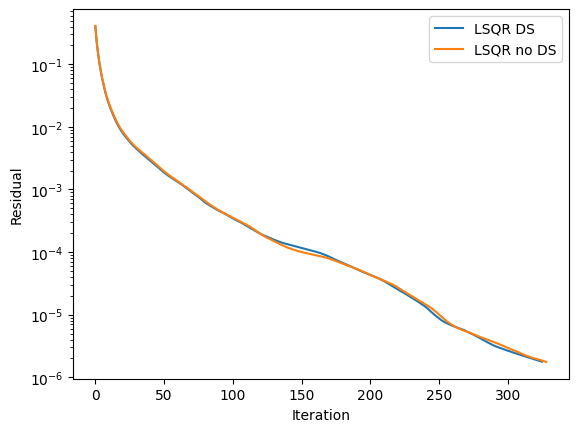

In [5]:
plt.plot(res2['loss'], label='LSQR DS')
plt.plot(res3['loss'], label='LSQR no DS')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.legend()

In [6]:
for (m, n) in [(50, 50)]:
    print(f"{m}x{n}")
    for _ in range(5): 
        std2 = 0.1
        std1 = 1
        rank_ratio = 0.5
        A, B, G1, G2, A_np, B_np, G1_np, G2_np, lamb_max = gaussian_data(m, n, std1=std1, std2=std2, 
                                                                 rank_ratio=rank_ratio, G_in_range=False)

        Y1, res1 = Y_dual_feasible(A1=B, A2=A, G1=G1, G2=G2, method="kron")
        Y2, res2 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Y", tol=1e-10, maxit=maxit, diag_scaling=True)
        Y3, res3 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Y", tol=1e-10, maxit=maxit, diag_scaling=False)
        assert res2["res"] == res2["loss"][-1] and res3["res"] == res3["loss"][-1]
        Y4, res4 = cvxpy_Y_sylvester_solve(A1=B, A2=A, G1=G1, G2=G2)
        assert np.allclose(res1['res'], res4['res'], atol=1e-6)
        print(f"Kron {res1['res']:.4e}, LSQR DS {res2['res']:.4e}, LSQR no DS {res3['res']:.4e}, CVXPY {res4['res']:.4e}")

50x50
Kron 7.0426e-01, LSQR DS 7.0426e-01, LSQR no DS 7.0426e-01, CVXPY 7.0426e-01
Kron 7.0828e-01, LSQR DS 7.0828e-01, LSQR no DS 7.0828e-01, CVXPY 7.0828e-01
Kron 7.0789e-01, LSQR DS 7.0789e-01, LSQR no DS 7.0789e-01, CVXPY 7.0789e-01
Kron 7.0239e-01, LSQR DS 7.0239e-01, LSQR no DS 7.0239e-01, CVXPY 7.0239e-01
Kron 7.1612e-01, LSQR DS 7.1612e-01, LSQR no DS 7.1612e-01, CVXPY 7.1612e-01


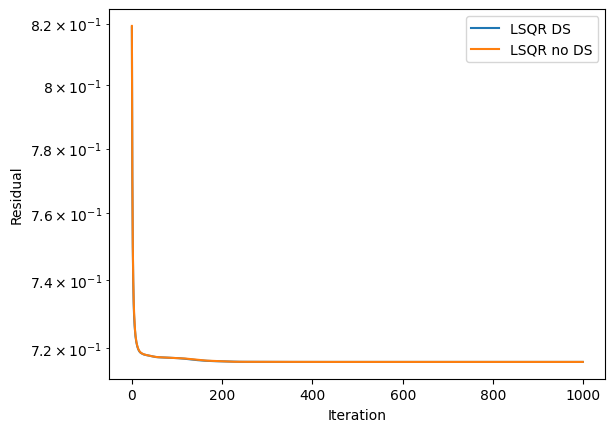

In [7]:
plt.plot(res2['loss'], label='LSQR DS')
plt.plot(res3['loss'], label='LSQR no DS')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.legend()

In [8]:
sizes = [(30, 60), (60, 30), (60, 60)]
trials = 3
sync = torch.cuda.synchronize if torch.cuda.is_available() else (lambda: None)

for (m, n) in sizes:
    print(f"\nSize {m}x{n}")
    for t in range(1, trials + 1):
        # Structured instance so a dual-feasible Y exists
        A, B, G1, G2, *_ = gaussian_data(m, n, std1=1.0, std2=0.1, rank_ratio=0.5, G_in_range=True)
 
        # Force CG branch by keeping max_kron small
        sync(); t0 = time.time()
        _, res_dp  = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Y", tol=1e-10, maxit=10000, diag_scaling=True)
        sync(); t1 = time.time()

        sync(); t2 = time.time()
        _, res_ns = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Y", tol=1e-10, maxit=10000, diag_scaling=False)
        sync(); t3 = time.time()

        print(f"trial {t}: diag res={res_dp['res']:.4e}, time={(t1-t0)*1e3:.1f}ms | "
              f"no-scale res={res_ns['res']:.4e}, time={(t3-t2)*1e3:.1f}ms")


Size 30x60
trial 1: diag res=1.9923e-06, time=30.7ms | no-scale res=1.8175e-06, time=25.8ms
trial 2: diag res=1.7153e-06, time=25.7ms | no-scale res=1.7402e-06, time=24.0ms
trial 3: diag res=1.7648e-06, time=26.6ms | no-scale res=1.7091e-06, time=25.1ms

Size 60x30
trial 1: diag res=1.4097e-06, time=18.2ms | no-scale res=1.4034e-06, time=17.7ms
trial 2: diag res=1.4866e-06, time=17.6ms | no-scale res=1.1886e-06, time=17.6ms
trial 3: diag res=1.3456e-06, time=16.9ms | no-scale res=1.3949e-06, time=17.8ms

Size 60x60
trial 1: diag res=1.7603e-06, time=271.0ms | no-scale res=1.7637e-06, time=277.1ms
trial 2: diag res=1.7362e-06, time=180.4ms | no-scale res=1.7511e-06, time=203.8ms
trial 3: diag res=1.7577e-06, time=175.4ms | no-scale res=1.7700e-06, time=186.6ms


# Minimize $\|\mathcal{A}(Z) +\beta \mathbf{sign}(Y^0)\|_F^2$, where  $\mathcal{A}(Z) = Z_1^\top A_1 + A_2^\top Z_2$

In [9]:
beta = 0.1
for (m, n) in [(10, 10), (30, 30), (40, 40)]:
    print(f"{m}x{n}")
    for _ in range(5): 
        std2 = 0.1
        std1 = 1
        rank_ratio = 0.5
        A, B, G1, G2, A_np, B_np, G1_np, G2_np, lamb_max = gaussian_data(m, n, std1=std1, std2=std2, 
                                                                 rank_ratio=rank_ratio, G_in_range=True)

        Y0, _ = Y_dual_feasible(A1=B, A2=A, G1=G1, G2=G2, method="lsqr")

        Z1_1, Z2_1, res1 = Z_sylvester_solve(A1=B, A2=A, Y0=Y0, beta=beta, method="kron", tol=1e-10)
        (Z1_2, Z2_2), res2 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Z", Y0=Y0, beta=beta, tol=1e-10, maxit=maxit, diag_scaling=True)
        (Z1_3, Z2_3), res3 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Z", Y0=Y0, beta=beta, tol=1e-10, maxit=maxit, diag_scaling=False)
        Z1_4, Z2_4, res4 = cvxpy_Z_sylvester_solve(A1=B, A2=A, Y0=Y0, beta=beta)
        # assert np.allclose(res1['res'], res4['res'], atol=1e-6)
        print(f"Kron {res1['res']:.4e}, LSQR DS {res2['res']:.4e}, LSQR no DS {res3['res']:.4e}, CVXPY {res4['res']:.4e}")

10x10
Kron 9.6260e-06, LSQR DS 1.8121e-06, LSQR no DS 1.7377e-06, CVXPY 2.8002e-15
Kron 1.7159e-05, LSQR DS 1.3918e-06, LSQR no DS 1.8902e-06, CVXPY 1.1254e-14
Kron 5.8089e-06, LSQR DS 1.2897e-06, LSQR no DS 1.9785e-06, CVXPY 1.9588e-15
Kron 4.7154e-06, LSQR DS 1.7165e-06, LSQR no DS 1.0420e-06, CVXPY 1.9375e-15
Kron 3.7670e-06, LSQR DS 1.8363e-06, LSQR no DS 1.4107e-06, CVXPY 1.3406e-15
30x30
Kron 2.2554e-04, LSQR DS 2.1210e-06, LSQR no DS 2.1746e-06, CVXPY 7.6028e-13
Kron 3.2754e-04, LSQR DS 1.4477e-06, LSQR no DS 1.4026e-06, CVXPY 1.0546e-14
Kron 1.2390e-03, LSQR DS 5.1247e-06, LSQR no DS 4.1939e-06, CVXPY 2.9819e-15
Kron 1.6038e-04, LSQR DS 1.3656e-06, LSQR no DS 1.4643e-06, CVXPY 1.0447e-14
Kron 1.7281e-05, LSQR DS 1.3050e-06, LSQR no DS 1.4240e-06, CVXPY 7.1535e-15
40x40
Kron 2.2949e-03, LSQR DS 1.3800e-06, LSQR no DS 1.3845e-06, CVXPY 9.3162e-15
Kron 9.8387e-05, LSQR DS 1.4745e-06, LSQR no DS 1.4795e-06, CVXPY 3.8500e-14
Kron 6.2446e-05, LSQR DS 1.3837e-06, LSQR no DS 1.4062e-06

In [10]:
beta = 0.1
for (m, n) in [(10, 10), (30, 30), (40, 40)]:
    print(f"{m}x{n}")
    for _ in range(5): 
        std2 = 0.1
        std1 = 1
        rank_ratio = 0.5
        A, B, G1, G2, A_np, B_np, G1_np, G2_np, lamb_max = gaussian_data(m, n, std1=std1, std2=std2, 
                                                                 rank_ratio=rank_ratio, G_in_range=False)

        Y0, _ = Y_dual_feasible(A1=B, A2=A, G1=G1, G2=G2, method="lsqr")

        Z1_1, Z2_1, res1 = Z_sylvester_solve(A1=B, A2=A, Y0=Y0, beta=beta, method="kron", tol=1e-10)
        (Z1_2, Z2_2), res2 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Z", Y0=Y0, beta=beta, tol=1e-10, maxit=maxit, diag_scaling=True)
        (Z1_3, Z2_3), res3 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Z", Y0=Y0, beta=beta, tol=1e-10, maxit=maxit, diag_scaling=False)
        Z1_4, Z2_4, res4 = cvxpy_Z_sylvester_solve(A1=B, A2=A, Y0=Y0, beta=beta)
        # assert np.allclose(res1['res'], res4['res'], atol=1e-6)
        print(f"Kron {res1['res']:.4e}, LSQR DS {res2['res']:.4e}, LSQR no DS {res3['res']:.4e}, CVXPY {res4['res']:.4e}")

10x10
Kron 8.2031e-05, LSQR DS 2.1063e-06, LSQR no DS 1.6815e-06, CVXPY 2.5024e-14
Kron 1.1772e-05, LSQR DS 1.5209e-06, LSQR no DS 1.9050e-06, CVXPY 1.3747e-14
Kron 2.0651e-05, LSQR DS 1.9848e-06, LSQR no DS 1.9443e-06, CVXPY 3.9152e-14
Kron 2.9755e-06, LSQR DS 1.7196e-06, LSQR no DS 1.6892e-06, CVXPY 4.5457e-15
Kron 1.0814e-05, LSQR DS 1.8965e-06, LSQR no DS 1.6066e-06, CVXPY 1.8946e-14
30x30
Kron 2.0630e-04, LSQR DS 4.1547e-06, LSQR no DS 3.7646e-06, CVXPY 1.4041e-13
Kron 2.4975e-03, LSQR DS 2.5916e-06, LSQR no DS 2.7002e-06, CVXPY 4.2369e-14
Kron 1.3829e-04, LSQR DS 2.2999e-06, LSQR no DS 2.3920e-06, CVXPY 1.7348e-13
Kron 6.3468e-05, LSQR DS 2.1938e-06, LSQR no DS 1.9543e-06, CVXPY 3.8763e-14
Kron 1.7021e-04, LSQR DS 1.8864e-06, LSQR no DS 2.0031e-06, CVXPY 3.5345e-14
40x40
Kron 3.2384e-04, LSQR DS 1.6455e-06, LSQR no DS 1.7007e-06, CVXPY 2.4988e-14
Kron 5.5344e-04, LSQR DS 1.1071e-05, LSQR no DS 1.2322e-05, CVXPY 2.5096e-12
Kron 1.7311e-04, LSQR DS 3.2975e-06, LSQR no DS 3.1942e-06

In [11]:
beta = 0.1
for (m, n, G_in_range) in [(500, 500, True), (500, 500, False)]:
    print(f"{m}x{n}, {G_in_range=}")
    for _ in range(5): 
        std2 = 0.1
        std1 = 1
        rank_ratio = 1
        A, B, G1, G2, A_np, B_np, G1_np, G2_np, lamb_max = gaussian_data(m, n, std1=std1, std2=std2, 
                                                                 rank_ratio=rank_ratio, G_in_range=G_in_range)

        Y0, y_res = Y_dual_feasible(A1=B, A2=A, G1=G1, G2=G2, method="lsqr")
 
        (Z1_2, Z2_2), res2 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Z", Y0=Y0, beta=beta, tol=1e-10, maxit=maxit, diag_scaling=True)
        (Z1_3, Z2_3), res3 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Z", Y0=Y0, beta=beta, tol=1e-10, maxit=maxit, diag_scaling=False)
        
        print(f"LSQR DS {res2['res']:.4e}, LSQR no DS {res3['res']:.4e}, Y res{y_res['res']:.4e}")

500x500, G_in_range=True
LSQR DS 1.0959e-03, LSQR no DS 1.1073e-03, Y res5.2077e-06
LSQR DS 5.1867e-04, LSQR no DS 5.2785e-04, Y res7.1955e-06
LSQR DS 1.2666e-03, LSQR no DS 1.2707e-03, Y res6.3372e-06
LSQR DS 9.9832e-04, LSQR no DS 1.0043e-03, Y res4.3389e-06
LSQR DS 1.1557e-03, LSQR no DS 1.1616e-03, Y res4.5978e-06
500x500, G_in_range=False
LSQR DS 2.7507e-02, LSQR no DS 2.8077e-02, Y res7.0714e-01
LSQR DS 4.7044e-02, LSQR no DS 4.7123e-02, Y res7.0609e-01
LSQR DS 2.7683e-02, LSQR no DS 2.7940e-02, Y res7.0628e-01
LSQR DS 1.1692e-01, LSQR no DS 1.1643e-01, Y res7.0625e-01
LSQR DS 4.6030e-02, LSQR no DS 4.6396e-02, Y res7.0764e-01


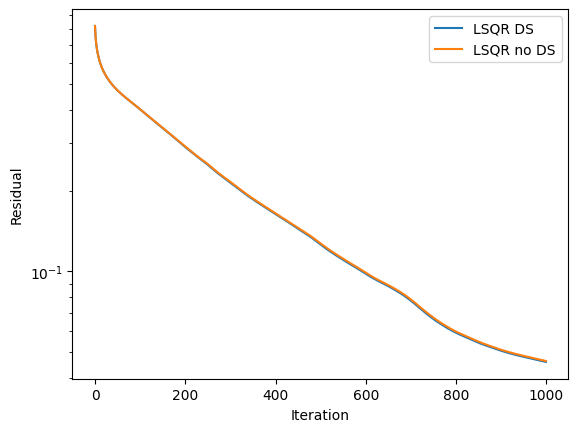

In [12]:
plt.plot(res2['loss'], label='LSQR DS')
plt.plot(res3['loss'], label='LSQR no DS')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.legend()